<a href="https://colab.research.google.com/github/Kufzuk2/Comp_math/blob/main/sem2_lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

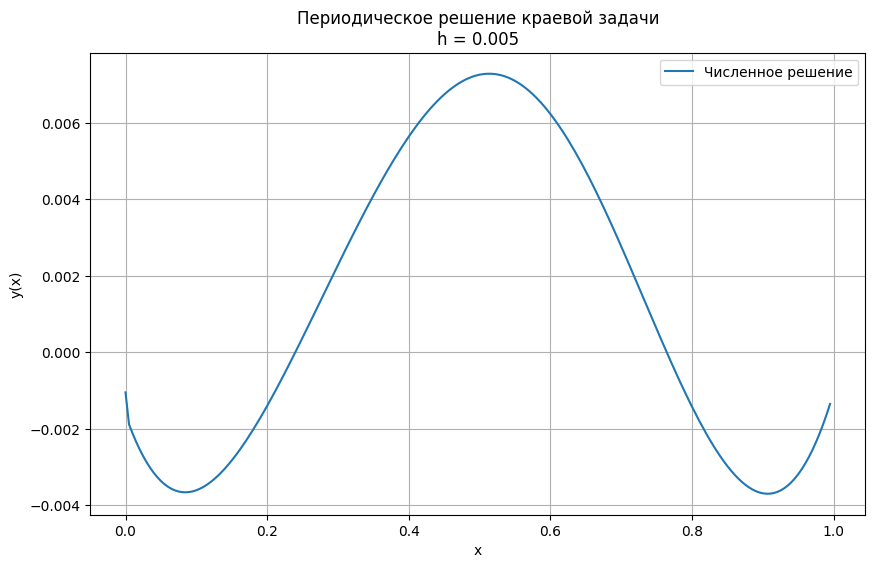

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def solve_periodic_bvp(h, P_func, f_func):

    N = int(1 / h)
    x = np.linspace(0, 1 - h, N)

    P_sq = P_func(x)**2
    f = f_func(x)

    # a_n*y_{n-1} + b_n*y_n + c_n*y_{n+1} = d_n

    a = np.ones(N) / h**2
    b = (-2/h**2 - P_sq)
    c = np.ones(N) / h**2
    d = f
    b[0] = -2/h**2 - P_sq[0]
    d[0] = f[0]


    b[-1] = -2/h**2 - P_sq[-1]
    d[-1] = f[-1]

    alpha = np.zeros(N)
    beta = np.zeros(N)
    gamma = np.zeros(N)

    alpha[0] = -c[0] / b[0]
    beta[0] = d[0] / b[0]
    gamma[0] = -a[0] / b[0]

    for i in range(1, N-1):
        denom = b[i] + a[i]*alpha[i-1]
        alpha[i] = -c[i] / denom
        beta[i] = (d[i] - a[i]*beta[i-1]) / denom
        gamma[i] = -a[i]*gamma[i-1] / denom

    i = N-1
    denom = b[i] + a[i]*alpha[i-1]

    u_N = ( -c[i] - a[i]*gamma[i-1] ) / denom
    v_N = ( d[i] - a[i]*beta[i-1] ) / denom

    y0 = (alpha[0]*beta[1] + beta[0] + gamma[0]*v_N) / (1 - gamma[0]*u_N - alpha[0]*alpha[1])

    y = np.zeros(N)
    y[0] = y0

    y[-1] = u_N * y[0] + v_N

    for i in range(N-2, 0, -1):
        y[i] = alpha[i]*y[i+1] + beta[i] + gamma[i]*y[-1]

    return x, y

def P_func(x):
    return 10 + np.sin(2*np.pi*x)

def f_func(x):
    return np.cos(2*np.pi*x)

h = 0.005
x, y = solve_periodic_bvp(h, P_func, f_func)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Численное решение')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Периодическое решение краевой задачи\nh = {}'.format(h))
plt.grid(True)
plt.legend()
plt.show()